In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Read all CSV files in the dataNASA folder
folder_path = 'D:\ISE\Challenge Task 1- Software Defect Prediction\data\Software Defect Prediction - Data\dataNASA'
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Concatenate all dataframes
data = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
#data = pd.read_csv('D:\ISE\Challenge Task 1- Software Defect Prediction\data\Software Defect Prediction - Data\dataNASA\KC3.csv')
# Drop the 'id' column
data = data.drop(columns=['id'])


# Show basic information
print(data.info())
print(data.head())


<>:7: SyntaxWarning: invalid escape sequence '\I'
<>:7: SyntaxWarning: invalid escape sequence '\I'
C:\Users\TUNG\AppData\Local\Temp\ipykernel_16212\2264528191.py:7: SyntaxWarning: invalid escape sequence '\I'
  folder_path = 'D:\ISE\Challenge Task 1- Software Defect Prediction\data\Software Defect Prediction - Data\dataNASA'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8705 entries, 0 to 8704
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        8705 non-null   int64  
 1   BRANCH_COUNT                     8705 non-null   int64  
 2   CALL_PAIRS                       7543 non-null   float64
 3   LOC_CODE_AND_COMMENT             8705 non-null   int64  
 4   LOC_COMMENTS                     8705 non-null   int64  
 5   CONDITION_COUNT                  7543 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            8705 non-null   int64  
 7   CYCLOMATIC_DENSITY               7543 non-null   float64
 8   DECISION_COUNT                   7543 non-null   float64
 9   DECISION_DENSITY                 3897 non-null   float64
 10  DESIGN_COMPLEXITY                8705 non-null   int64  
 11  DESIGN_DENSITY                   7543 non-null   float64
 12  EDGE_COUNT          

In [2]:
# Map 'Defective' values 'Y' to 1 and 'N' to 0
data['Defective'] = data['Defective'].map({'Y': 1, 'N': 0})

# Verify the mapping
print(data['Defective'].value_counts())

Defective
0    7409
1    1296
Name: count, dtype: int64


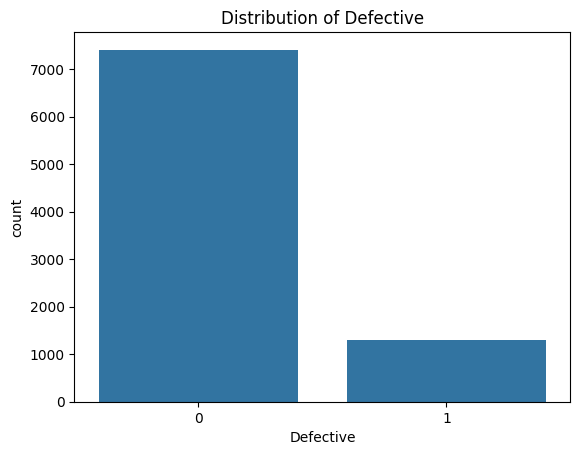

In [3]:
# Plot the distribution of the target variable
sns.countplot(x='Defective', data=data)  # Replace 'target_column' with the actual column name
plt.title('Distribution of Defective')
plt.show()


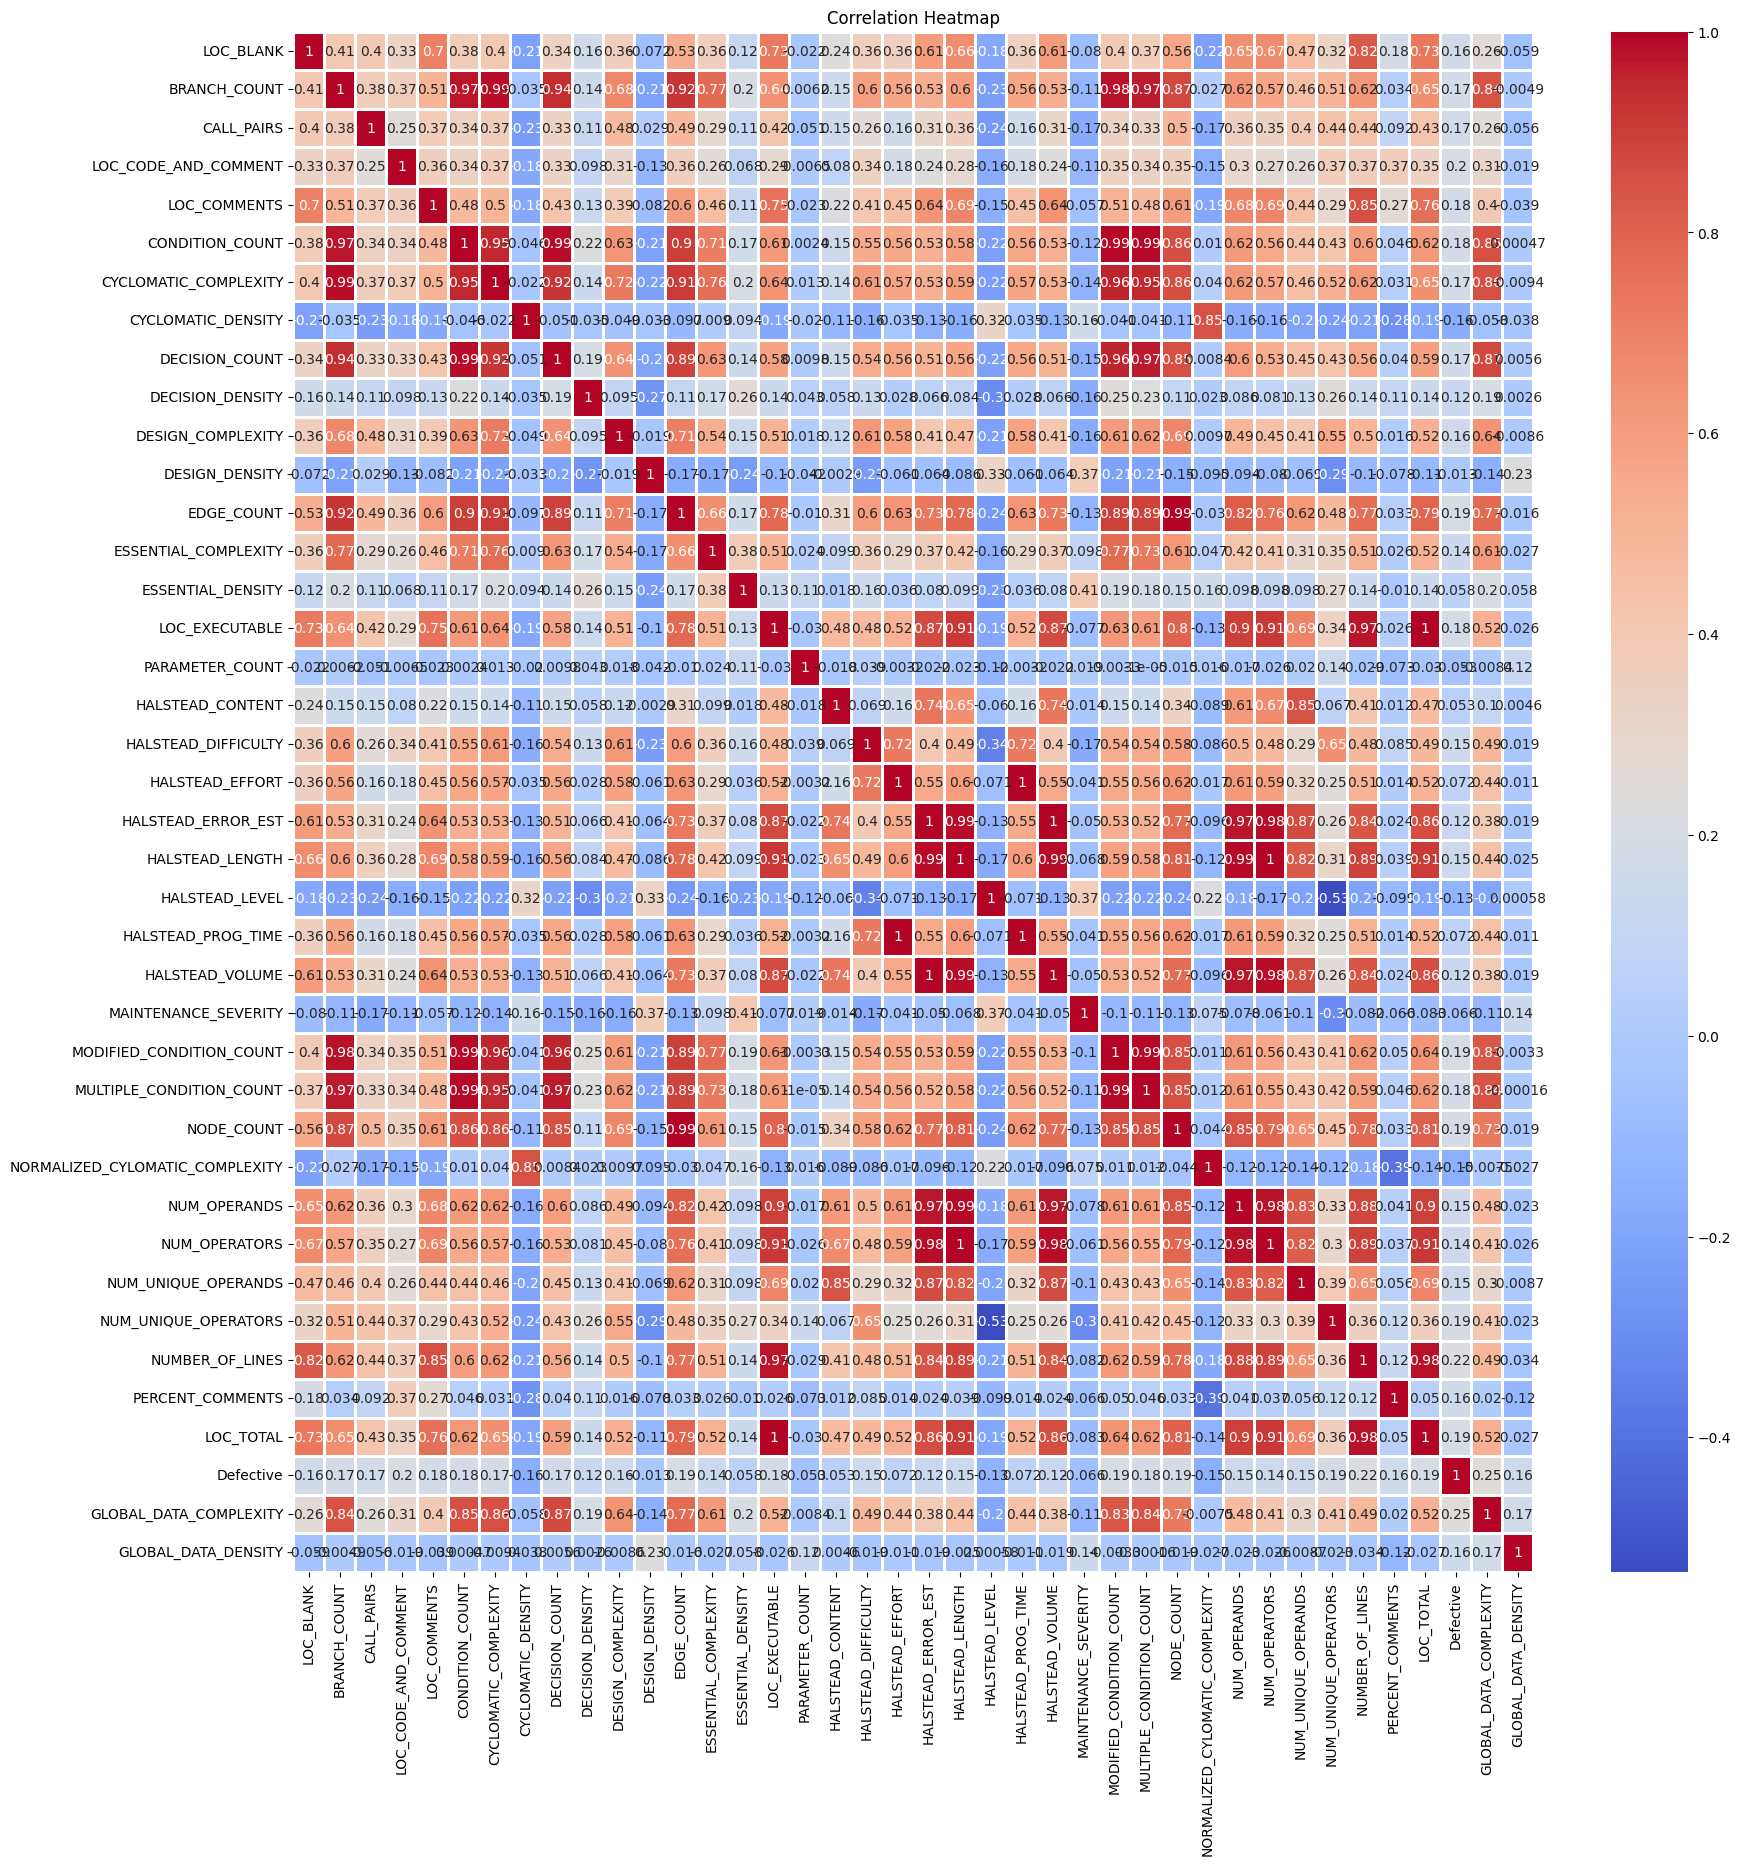

In [4]:
# Correlation matrix
plt.figure(figsize=(20,20))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


Top 10 features with highest correlation to 'Defective':
Index(['GLOBAL_DATA_COMPLEXITY', 'NUMBER_OF_LINES', 'LOC_CODE_AND_COMMENT',
       'LOC_TOTAL', 'MODIFIED_CONDITION_COUNT', 'EDGE_COUNT',
       'NUM_UNIQUE_OPERATORS', 'NODE_COUNT', 'MULTIPLE_CONDITION_COUNT',
       'CONDITION_COUNT'],
      dtype='object')


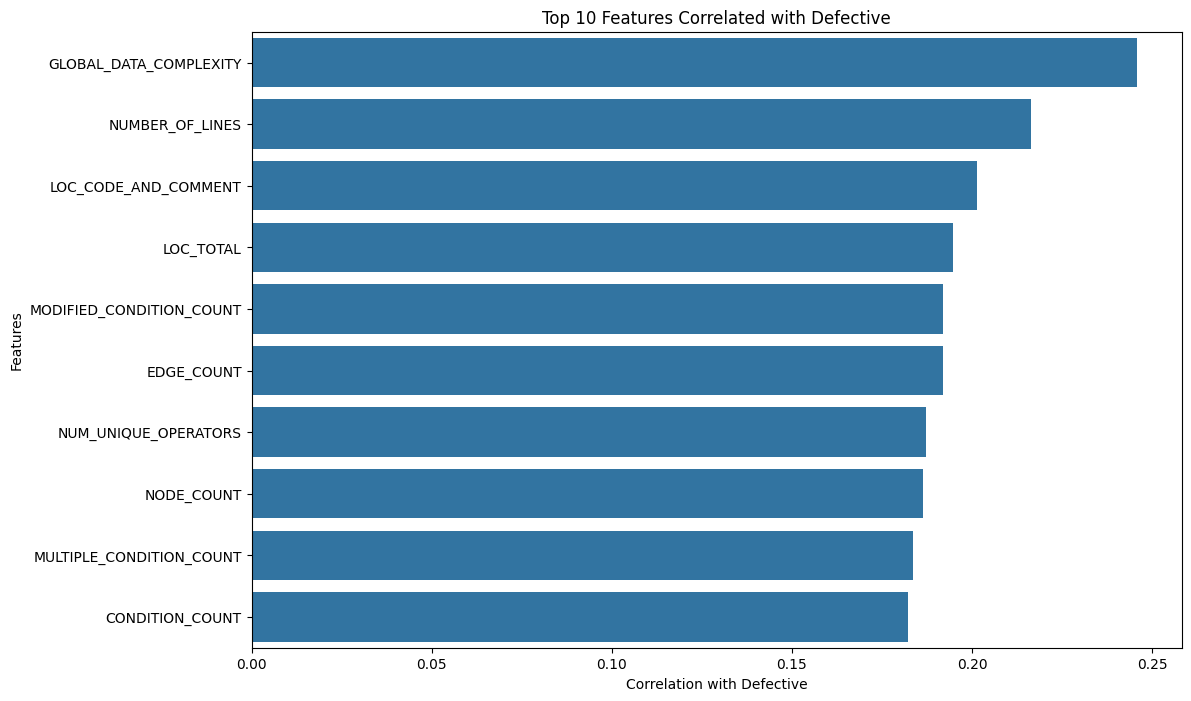

In [5]:
# Calculate the correlation of all features with the 'Defective' column
correlation_with_defective = correlation_matrix['Defective'].abs().sort_values(ascending=False)

# Get the top 10 features with the highest correlation to 'Defective'
top_10_features = correlation_with_defective.index[1:11]  # Exclude 'Defective' itself
print("Top 10 features with highest correlation to 'Defective':")
print(top_10_features)

# Draw bar plot to present correlation value of each feature to Defective
plt.figure(figsize=(12, 8))
sns.barplot(x=correlation_with_defective[top_10_features].values, y=top_10_features)
plt.xlabel('Correlation with Defective')
plt.ylabel('Features')
plt.title('Top 10 Features Correlated with Defective')
plt.show()

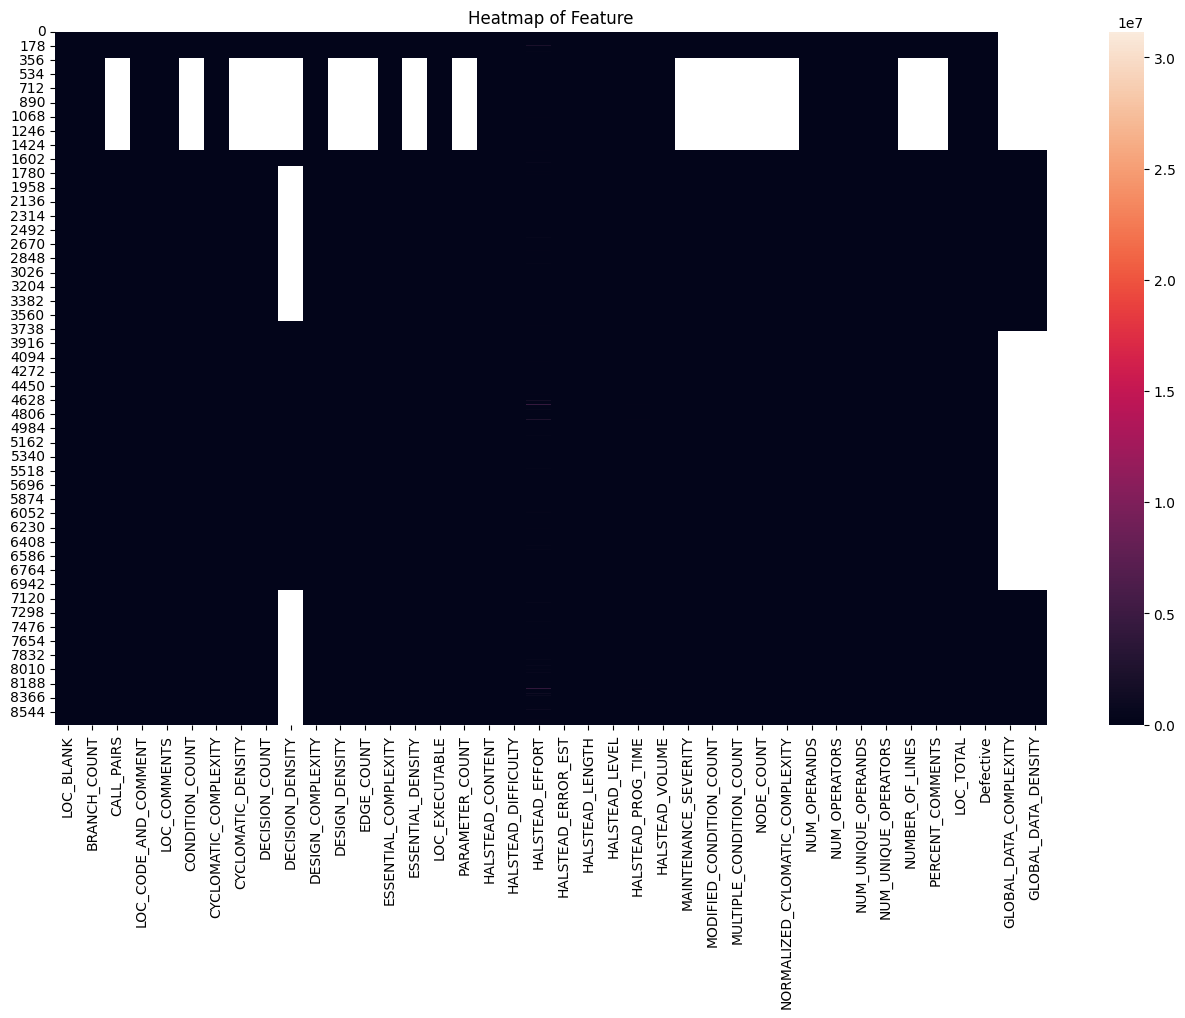

In [6]:
# Draw heatmap of features to see their values
plt.figure(figsize=(16, 9))
sns.heatmap(data)
plt.title('Heatmap of Feature')
plt.show()

DATA PREPROCESSING

In [7]:
X = data.drop('Defective', axis=1)
X = (X-X.min())/(X.max()-X.min())
X

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY
0,0.002841,0.002740,0.000000,0.000000,0.008879,0.003484,0.002740,0.146667,0.003509,0.173913,...,0.22,0.000967,0.000921,0.001785,0.07,0.002646,0.491437,0.004344,NaN,NaN
1,0.004261,0.002740,0.000000,0.011111,0.002220,0.003484,0.002740,0.100000,0.003509,0.173913,...,0.11,0.001935,0.002025,0.002231,0.12,0.005952,0.278509,0.006274,NaN,NaN
2,0.053977,0.046575,0.055556,0.027778,0.077691,0.050523,0.046575,0.113333,0.042105,0.210435,...,0.08,0.029019,0.020438,0.025881,0.32,0.071759,0.437552,0.052606,NaN,NaN
3,0.001420,0.008219,0.069444,0.000000,0.013319,0.010453,0.008219,0.066667,0.010526,0.173913,...,0.06,0.009673,0.007273,0.016064,0.19,0.022156,0.236424,0.019788,NaN,NaN
4,0.012784,0.019178,0.055556,0.077778,0.024417,0.024390,0.019178,0.133333,0.024561,0.173913,...,0.11,0.005610,0.005892,0.008478,0.18,0.023810,0.596700,0.019788,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,0.045455,0.013699,0.013889,0.000000,0.000000,0.015679,0.013699,0.153333,0.014035,NaN,...,0.10,0.008706,0.005892,0.010263,0.16,0.019841,0.000000,0.012548,0.026786,1.00
8701,0.011364,0.013699,0.444444,0.011111,0.008879,0.017422,0.013699,0.026667,0.017544,NaN,...,0.04,0.055910,0.029276,0.056225,0.08,0.053241,0.068713,0.069498,0.004464,0.17
8702,0.011364,0.091781,0.083333,0.188889,0.024417,0.104530,0.098630,0.126667,0.105263,NaN,...,0.16,0.043722,0.030565,0.037929,0.25,0.076389,0.265769,0.095560,0.160714,0.97
8703,0.019886,0.035616,0.083333,0.022222,0.047725,0.040070,0.035616,0.113333,0.035088,NaN,...,0.10,0.020313,0.020070,0.016064,0.22,0.046958,0.386487,0.040541,0.031250,0.50


In [50]:
X.describe()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,GLOBAL_DATA_COMPLEXITY,GLOBAL_DATA_DENSITY
count,8705.000000,8705.000000,7543.000000,8705.000000,8705.000000,7543.000000,8705.000000,7543.000000,7543.000000,3897.000000,...,7543.000000,8705.000000,8705.000000,8705.000000,8705.000000,7543.000000,7543.000000,8705.000000,3964.000000,3964.000000
mean,0.011003,0.013650,0.046712,0.011421,0.008168,0.014780,0.013899,0.172500,0.013389,0.158764,...,0.167643,0.012704,0.008927,0.009698,0.129736,0.018307,0.190059,0.017564,0.017617,0.568151
std,0.028099,0.032579,0.064730,0.032959,0.028048,0.036989,0.033657,0.115217,0.033016,0.076853,...,0.127133,0.037944,0.028810,0.018958,0.074797,0.044848,0.201826,0.043826,0.048881,0.461398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001420,0.002740,0.013889,0.000000,0.000000,0.003484,0.002740,0.100000,0.003509,0.173913,...,0.090000,0.002322,0.001565,0.003124,0.080000,0.003968,0.000000,0.004344,0.000000,0.000000
50%,0.004261,0.005479,0.027778,0.000000,0.001110,0.006969,0.005479,0.146667,0.007018,0.173913,...,0.140000,0.005223,0.003590,0.005801,0.120000,0.008267,0.139202,0.008205,0.004464,0.820000
75%,0.011364,0.013699,0.055556,0.011111,0.006659,0.015679,0.013699,0.220000,0.014035,0.179130,...,0.210000,0.011414,0.008010,0.011156,0.160000,0.017857,0.315372,0.017375,0.017857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


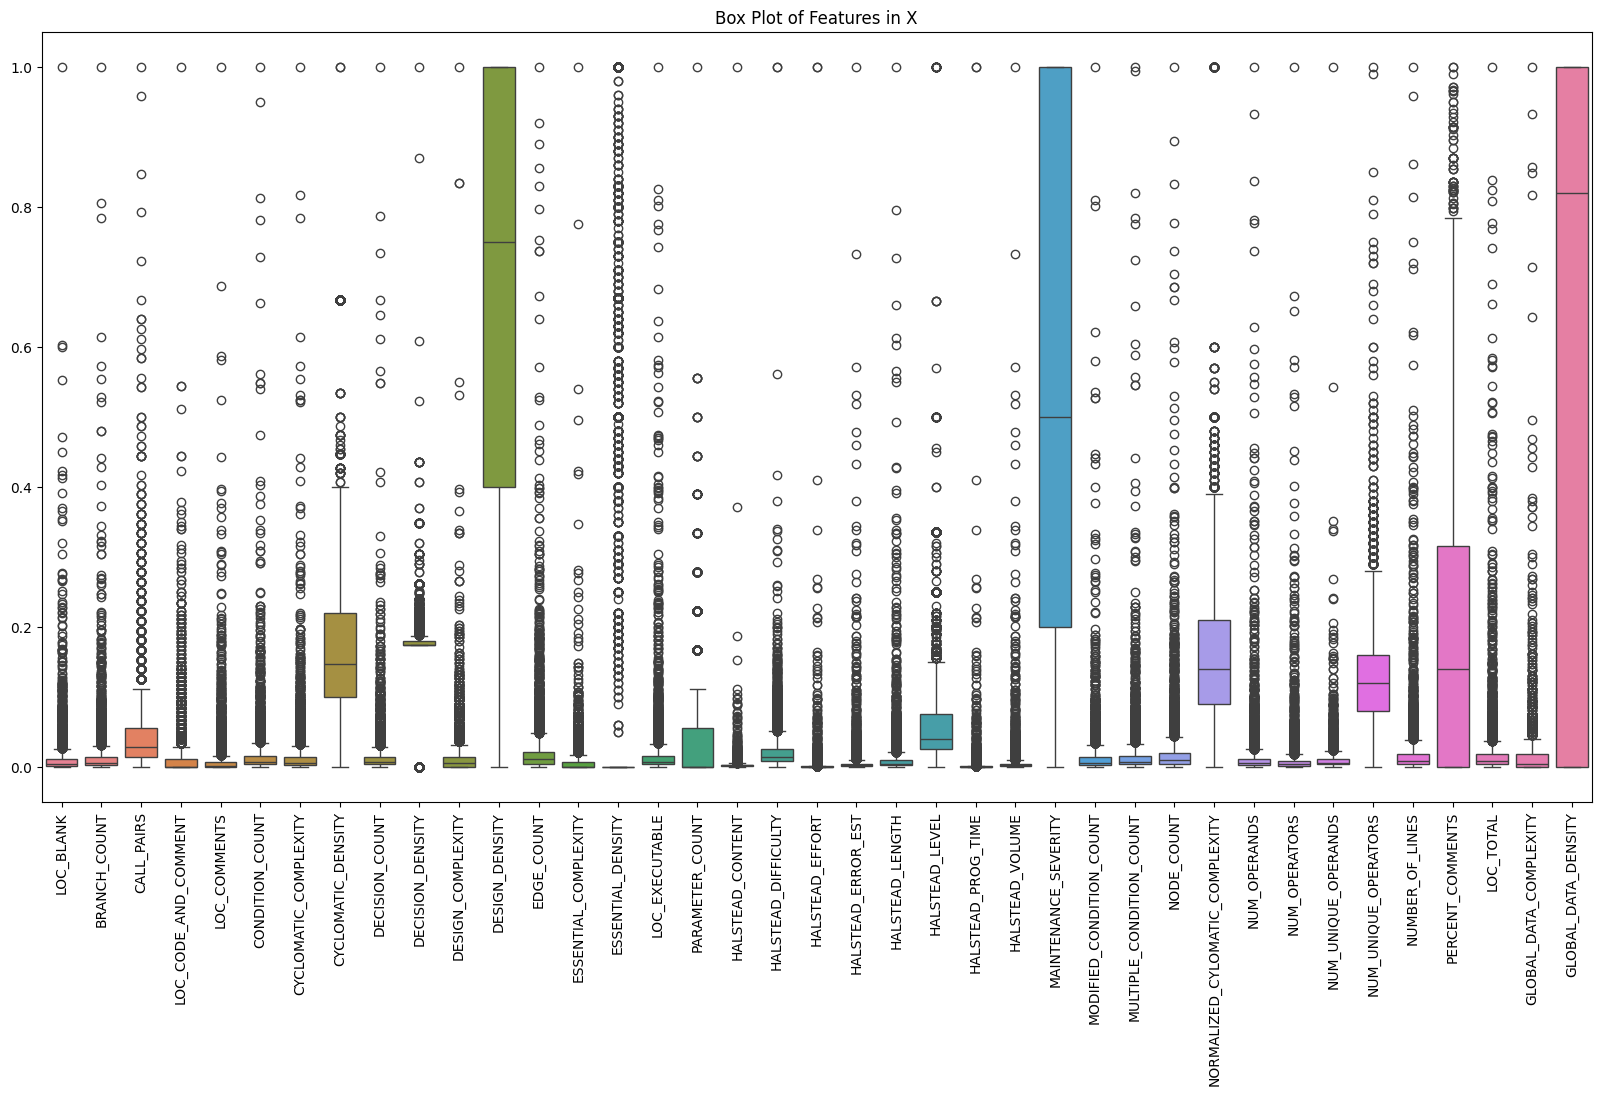

In [51]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Box Plot of Features in X')
plt.show()

In [52]:
y = data['Defective']
y

0       0
1       0
2       0
3       1
4       0
       ..
8700    0
8701    0
8702    0
8703    1
8704    1
Name: Defective, Length: 8705, dtype: int64

In [57]:
# Check for missing values
#print(X.isnull().sum())

# Option 1: Fill missing values with the mean of each column
X = X.fillna(X.mean())

# Option 2: Drop rows with missing values
#X = X.dropna()
#y = y[X.index]
#print(y.count())
# Option 3: Forward fill missing values
# data = data.fillna(method='ffill')

<Axes: >

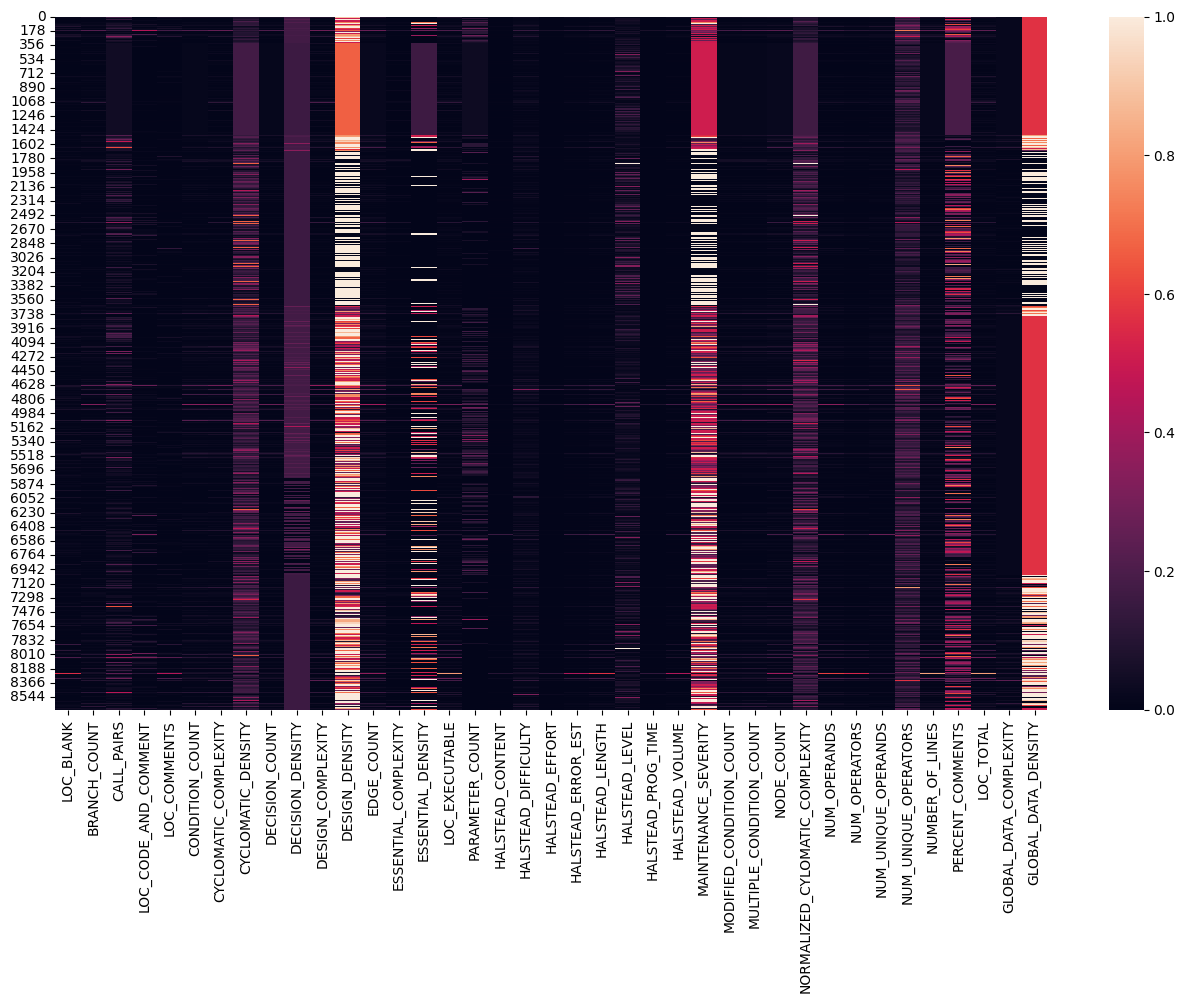

In [58]:
plt.figure(figsize=(16, 9))
sns.heatmap(X)